In [41]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [42]:
train_labels = []
train_samples = []

In [43]:
#Training labels for 5% 
for i in range(50):
    rand_younger = randint(13, 64)
    train_samples.append(rand_younger)
    train_labels.append(1)      #label chosen by us - 1 means they had side-effects from drug tested

    rand_older = randint(65, 100)
    train_samples.append(rand_older)
    train_labels.append(0)      # 0 here means no side effects observed

#Training labels for rest 95% 
for i in range(950):
    rand_younger = randint(13, 64)
    train_samples.append(rand_younger)
    train_labels.append(0)      #label chosen by us - 1 means they had side-effects from drug tested

    rand_older = randint(65, 100)
    train_samples.append(rand_older)
    train_labels.append(1)      # 0 here means no side effects observed

In [44]:
#Now we need to take the lists created in cell above and convert it to a numpy array 
#so that it can be used by fit function of tensorflow for training purposes
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [45]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy


In [47]:
model = Sequential([
    Dense(units = 16, input_shape = (1,), activation = 'relu'),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
model.fit(x = scaled_train_samples, y = train_labels, validation_split=0.1, 
batch_size= 10, epochs = 30, shuffle = True, verbose = 2)

Epoch 1/30
180/180 - 1s - loss: 0.7089 - accuracy: 0.3650 - val_loss: 0.6960 - val_accuracy: 0.0800 - 539ms/epoch - 3ms/step
Epoch 2/30
180/180 - 0s - loss: 0.6843 - accuracy: 0.5333 - val_loss: 0.6732 - val_accuracy: 0.6400 - 148ms/epoch - 823us/step
Epoch 3/30
180/180 - 0s - loss: 0.6605 - accuracy: 0.6594 - val_loss: 0.6507 - val_accuracy: 0.7100 - 149ms/epoch - 827us/step
Epoch 4/30
180/180 - 0s - loss: 0.6378 - accuracy: 0.7172 - val_loss: 0.6271 - val_accuracy: 0.7350 - 147ms/epoch - 817us/step
Epoch 5/30
180/180 - 0s - loss: 0.6130 - accuracy: 0.7489 - val_loss: 0.6018 - val_accuracy: 0.7500 - 161ms/epoch - 895us/step
Epoch 6/30
180/180 - 0s - loss: 0.5873 - accuracy: 0.7667 - val_loss: 0.5757 - val_accuracy: 0.7750 - 171ms/epoch - 949us/step
Epoch 7/30
180/180 - 0s - loss: 0.5589 - accuracy: 0.8061 - val_loss: 0.5446 - val_accuracy: 0.7900 - 161ms/epoch - 894us/step
Epoch 8/30
180/180 - 0s - loss: 0.5278 - accuracy: 0.8300 - val_loss: 0.5114 - val_accuracy: 0.8000 - 152ms/epoch

In [51]:
test_labels = []
test_samples = []

In [52]:
#Training labels for 5% 
for i in range(50):
    rand_younger = randint(13, 64)
    test_samples.append(rand_younger)
    test_labels.append(1)      #label chosen by us - 1 means they had side-effects from drug tested

    rand_older = randint(65, 100)
    test_samples.append(rand_older)
    test_labels.append(0)      # 0 here means no side effects observed

#Training labels for rest 95% 
for i in range(950):
    rand_younger = randint(13, 64)
    test_samples.append(rand_younger)
    test_labels.append(0)      #label chosen by us - 1 means they had side-effects from drug tested

    rand_older = randint(65, 100)
    test_samples.append(rand_older)
    test_labels.append(1)      # 0 here means no side effects observed

In [53]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [54]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

## Predict

In [55]:
predictions = model.predict(x = scaled_test_samples, batch_size = 10, verbose = 0)

In [56]:
for i in predictions:
    print(i)

[0.04576822 0.9542318 ]
[0.5147476  0.48525238]
[0.9639278 0.0360722]
[0.1209501 0.8790499]
[0.36768392 0.63231605]
[0.07130623 0.92869383]
[0.10889969 0.8911003 ]
[0.06350005 0.9364999 ]
[0.04834895 0.95165104]
[0.45475864 0.54524136]
[0.9640418  0.03595822]
[0.45475864 0.54524136]
[0.9598053  0.04019475]
[0.26442316 0.7355768 ]
[0.9637275  0.03627253]
[0.91148955 0.08851045]
[0.26442316 0.7355768 ]
[0.9639849  0.03601516]
[0.91148955 0.08851045]
[0.94209945 0.0579005 ]
[0.6857697  0.31423038]
[0.9639563  0.03604367]
[0.28846106 0.711539  ]
[0.9639849  0.03601516]
[0.31375226 0.6862478 ]
[0.96401334 0.03598667]
[0.04331966 0.9566804 ]
[0.9356029  0.06439706]
[0.96364135 0.03635868]
[0.9639278 0.0360722]
[0.9639278 0.0360722]
[0.92036736 0.07963262]
[0.95706296 0.04293699]
[0.28846106 0.711539  ]
[0.7792591  0.22074093]
[0.9598053  0.04019475]
[0.20039804 0.799602  ]
[0.9640418  0.03595822]
[0.03472782 0.9652722 ]
[0.14874075 0.85125923]
[0.92036736 0.07963262]
[0.42514277 0.57485723]


In [57]:
rounded_predictions = np.argmax(predictions, axis = -1)

In [58]:
for i in rounded_predictions:
    print(i)

1
0
0
1
1
1
1
1
1
1
0
1
0
1
0
0
1
0
0
0
0
0
1
0
1
0
1
0
0
0
0
0
0
1
0
0
1
0
1
1
0
1
1
1
0
1
0
1
1
1
0
0
0
0
0
0
1
1
0
1
0
1
0
0
1
0
1
1
0
0
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
0
0
1
0
1
0
0
0
1
0
1
1
1
1
1
0
1
1
1
1
1
0
1
0
0
1
0
0
0
1
1
0
0
1
0
1
1
1
0
1
0
1
0
1
1
1
1
1
1
1
1
0
0
1
1
0
0
0
1
1
0
1
1
0
0
1
0
0
0
0
1
0
0
0
0
1
0
1
0
1
1
1
0
0
0
1
1
1
1
1
1
0
1
0
1
1
0
1
0
0
0
1
0
1
0
1
1
0
1
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
1
1
1
0
1
0
0
1
1
1
0
0
1
1
0
0
1
0
1
0
1
1
1
0
1
1
0
0
0
0
1
1
1
0
0
1
0
1
1
1
1
0
0
1
1
1
1
0
1
0
1
0
1
0
0
0
1
1
1
1
0
1
1
1
1
0
0
1
0
0
0
0
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
0
0
0
1
0
1
0
1
1
1
1
0
0
0
0
0
1
0
1
1
1
0
0
0
0
1
0
0
1
1
1
0
0
0
1
0
1
0
0
1
0
0
0
0
0
1
0
1
0
1
1
0
1
0
0
1
1
0
1
0
0
1
1
0
0
0
1
1
1
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
0
1
0
1
1
0
0
1
0
0
1
0
0
0
1
0
1
0
1
0
0
0
1
1
1
1
1
0
1
1
1
0
1
0
0
0
1
0
0
1
1
1
1
0
1
0
1
1
1
1
0
0
1
1
0
0
0
1
1
0
0
1
1
0
0
0
0
1
0
0
0
0
0
0
1
1
0
0
0
1
0
0
0
1
1
1
1
1
1
1
0
0
1
0
0
0
1
1
0
1
1
1
0
1
1
0
1
1
1
0
0
0


# Confusion Matrix

In [59]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_plot_labels = ["no_side_effects", "had_side_effects"]
cm = confusion_matrix(y_true = test_labels, y_pred = rounded_predictions, labels = None)

In [61]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cm_plot_labels)

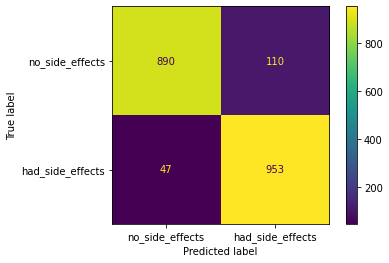

In [62]:
disp.plot()
plt.show()